# Tests for Scalar_field_XYZ

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib

%matplotlib notebook

In [2]:
# import os
# print os.environ.get('QT_API')
# os.environ["QT_API"] = "pyqt5"
# print os.environ.get('QT_API')


In [3]:
# from traits.etsconfig.api import ETSConfig
# ETSConfig.toolkit = 'qt5'

In [4]:
from diffractio import np, plt, um, degrees, mm
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

## init

In [5]:
x = np.linspace(-50 * um, 50 * um, 64)
y = np.linspace(-50 * um, 50 * um, 64)
z = np.linspace(-50 * um, 50 * um, 64)

wavelength = 5 * um

t1 = Scalar_field_XYZ(x, y, z, wavelength)
t1.u = np.sin(2*np.pi*t1.X/20)
t1.info = "test"

In [6]:
print(t1)

Scalar_field_XYZ
 - x:  (64,),   y:  (64,),  z:  (64,),   u:  (64, 64, 64)
 - xmin:       -50.00 um,  xmax:      50.00 um
 - ymin:       -50.00 um,  ymax:      50.00 um
 - zmin:       -50.00 um,  zmax:      50.00 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 180.00 deg
 - wavelength: 5.00 um
 - date:       2019-09-16_19_16_47
 - info:       test



<IPython.core.display.Javascript object>


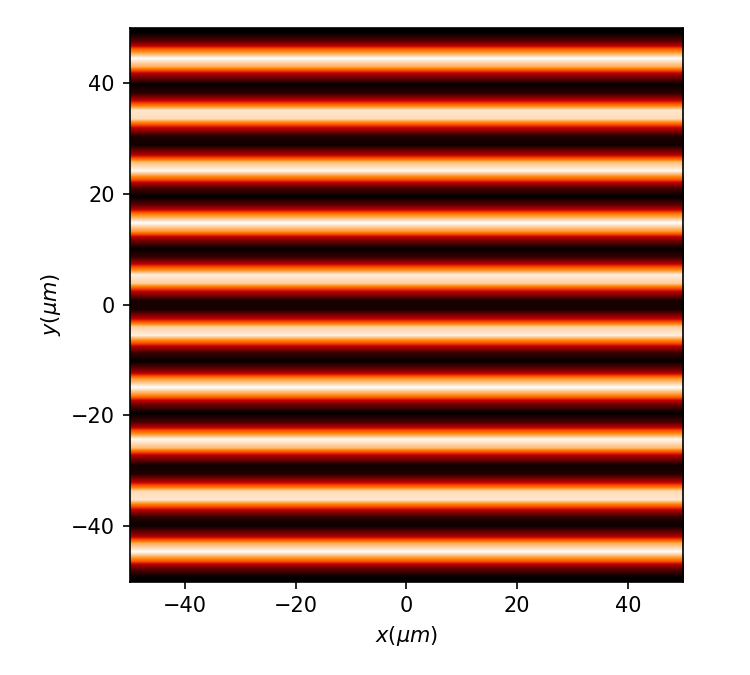

In [7]:
t1.draw_XY(z0=1)

## add

In [8]:
x = np.linspace(-50 * um, 50 * um, 64)
y = np.linspace(-50 * um, 50 * um, 64)
z = np.linspace(-50 * um, 50 * um, 64)

wavelength = 5 * um

t1 = Scalar_field_XYZ(x, y, z, wavelength)
t1.u = np.sin(2*np.pi*t1.X/30)
t1.info = "test x"

t2 = Scalar_field_XYZ(x, y, z, wavelength)
t2.u = np.sin(2*np.pi*t1.Y/30)
t2.info = "test y"

t3=t1+t2
print(t3)

Scalar_field_XYZ
 - x:  (64,),   y:  (64,),  z:  (64,),   u:  (64, 64, 64)
 - xmin:       -50.00 um,  xmax:      50.00 um
 - ymin:       -50.00 um,  ymax:      50.00 um
 - zmin:       -50.00 um,  zmax:      50.00 um
 - Imin:       0.00,     Imax:      3.99
 - phase_min:  0.00 deg, phase_max: 180.00 deg
 - wavelength: 5.00 um
 - date:       2019-09-16_19_16_50
 - info:       



<IPython.core.display.Javascript object>


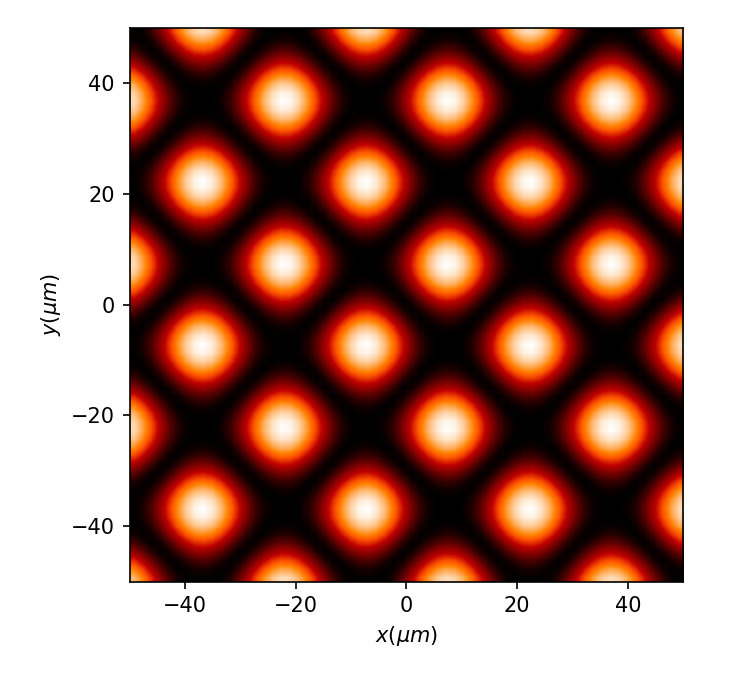

In [9]:
t3.draw_XY(z0=0, logarithm=True)

## Sub

In [10]:
x = np.linspace(-50 * um, 50 * um, 64)
y = np.linspace(-50 * um, 50 * um, 64)
z = np.linspace(-50 * um, 50 * um, 64)

wavelength = 5 * um

t1 = Scalar_field_XYZ(x, y, z, wavelength)
t1.u = 2*np.sin(2*np.pi*t1.X/30)
t1.info = "test x"

t2 = Scalar_field_XYZ(x, y, z, wavelength)
t2.u = np.sin(2*np.pi*t1.X/30)
t2.info = "test y"

t3=t1-t2
print(t3)

Scalar_field_XYZ
 - x:  (64,),   y:  (64,),  z:  (64,),   u:  (64, 64, 64)
 - xmin:       -50.00 um,  xmax:      50.00 um
 - ymin:       -50.00 um,  ymax:      50.00 um
 - zmin:       -50.00 um,  zmax:      50.00 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 180.00 deg
 - wavelength: 5.00 um
 - date:       2019-09-16_19_16_52
 - info:       



<IPython.core.display.Javascript object>


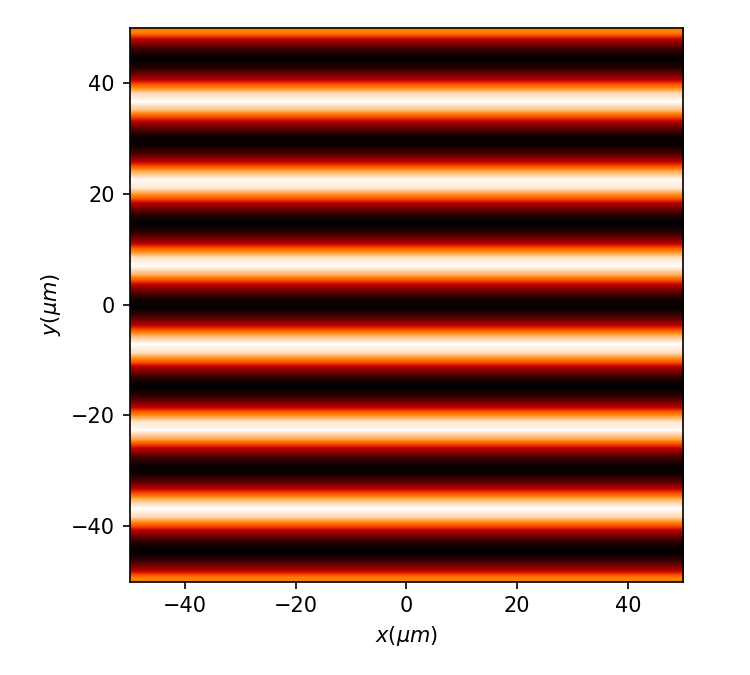

0.999136696183564 -0.9991366961835642


In [11]:
t3.draw_XY(z0=0)
print(t3.u.max(), t3.u.min())

## RS propagation

In [12]:
x = np.linspace(-50 * um, 50 * um, 256)
y = np.linspace(-50 * um, 50 * um, 256)
z = np.linspace(-200*um, 200*um, 25)

wavelength = 5 * um

u0=Scalar_source_XY(x,y,wavelength)
u0.gauss_beam(r0=(0,0), w0=(15*um,15*um), z0=200*um, A=1, theta=0*degrees, phi=-5*degrees)

u_xyz = Scalar_field_XYZ(x, y, z, wavelength)
u_xyz.incident_field(u0)

In [14]:
u_xyz.RS(verbose=False)

/home/luismiguel/bitbucket/diffractio/diffractio/scalar_fields_XY.py:1605: RuntimeWarning: invalid value encountered in true_divide
  return 1 / (2 * pi) * exp(-1.j * k * R) * z / R * (1 / R + 1.j * k)
/home/luismiguel/bitbucket/diffractio/diffractio/scalar_fields_XY.py:1605: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (2 * pi) * exp(-1.j * k * R) * z / R * (1 / R + 1.j * k)


time in RS= 3.9831318855285645. num proc= 4


3.9831318855285645

In [14]:
u_xyz.u0.draw()

<IPython.core.display.Javascript object>

(<Figure size 500x450 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f938baa7908>)

In [15]:
u_xyz.draw_XYZ()

vea y cierre la ventana abierta para continuar


In [16]:
u_xyz.draw_XZ(y0=0)

<IPython.core.display.Javascript object>

In [17]:
u_xyz.drawVolumen3D(logarithm=False)

ValueError: cannot reshape array of size 16 into shape (0,0,4)

## Beam widths

<IPython.core.display.Javascript object>


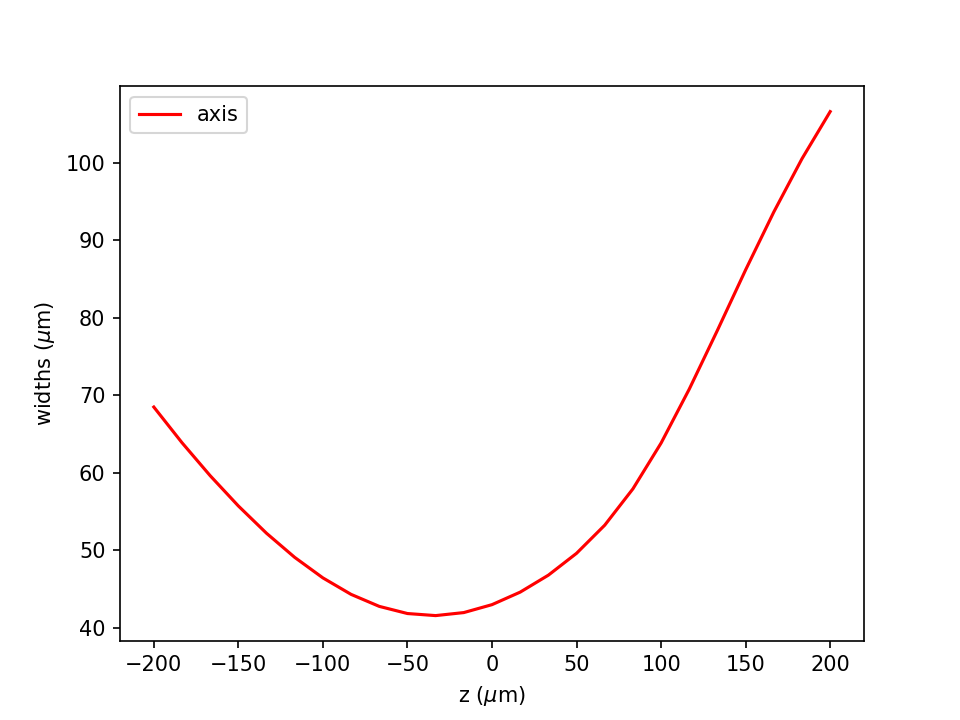

In [67]:
u_xyz.beam_widths(has_draw=True);

### test_other

In [24]:
length = 100 * um
numdata = 256  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

In [25]:
period = 10 * um
z_talbot = 2 * period**2 / wavelength

z0 = np.linspace(2 * z_talbot, 6 * z_talbot, 32)

In [26]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))

In [27]:
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(period=10 * um, x0=0 * um, angle=0 * degrees)

In [28]:
t3 = u1 * t1

In [29]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t1)

In [30]:
uxyz.RS()

PicklingError: Can't pickle <class 'diffractio.scalar_fields_XYZ.Scalar_field_XYZ'>: it's not the same object as diffractio.scalar_fields_XYZ.Scalar_field_XYZ

In [19]:
uxyz.draw_XYZ(logarithm=False, normalize='maximum')

vea y cierre la ventana abierta para continuar


In [21]:
uxyz.info = """info:
    test_other(self):
    """
filename = uxyz.save_data(filename='#')
del uxyz

NameError: name 'uxyz' is not defined

In [20]:
u2 = Scalar_field_XYZ(None, None, None)
u2.load_data(filename=filename, verbose=True)
u2.draw_XYZ(logarithm=False, normalize='maximum')
u2.save_data(filename=filename, method='savez_compressed')
save_figure_test(newpath, func_name)
assert True

/home/luismiguel/.local/lib/python3.6/site-packages/hickle/hickle.py:416: SerializedWarning: <class 'diffractio.scalar_masks_XY.Scalar_mask_XY'> type not understood, data have been serialized
  SerializedWarning)


<class 'bool'>


FileError: Cannot open file. Please pass either a filename string, a file object, or a h5py.File

## test_propagacion_RS_Talbot

In [22]:
length = 200 * um
numdata = 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

period = 10 * um
z_talbot = 2 * period**2 / wavelength

z0 = np.linspace(2 * z_talbot, 6 * z_talbot, numdata)

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(period=10 * um, x0=0 * um, angle=0 * degrees)
t3 = u1 * t1

In [23]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()

PicklingError: Can't pickle <class 'diffractio.scalar_fields_XYZ.Scalar_field_XYZ'>: it's not the same object as diffractio.scalar_fields_XYZ.Scalar_field_XYZ

In [ ]:
uScalar_field_XY = uxyz.to_Scalar_field_XY(z0=3 * mm)
uScalar_field_XY.draw(kind='intensity', cut_value=None)

uxyz.draw_XY(z0=np.array(2 * mm))
uxyz.draw_XY(z0=np.array(4.5 * mm))
uxyz.draw_intensityYZ(x0=0 * mm, logarithm=True, normalize='maximum')
# uxyz.draw_XYZ(logarithm=False, normalize='maximum')
# uxyz.drawVolumen3D(logarithm=1, normalize='maximum', maxintensity=None)
uxyz.save_data(
    filename=filename, method='savez_compressed', add_name='')

uxyz.video(filename=filename + '.avi', kind='intensity', frame=True)